DICOM Lung Nodule Visualization Tool
------------------------------------


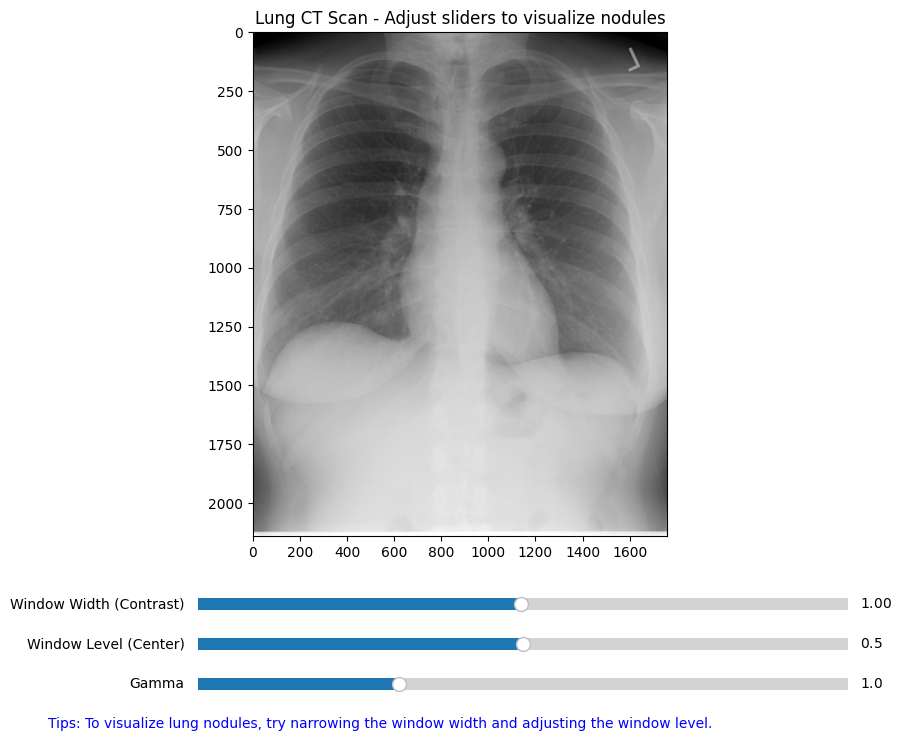

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pydicom
import os

def load_and_visualize_dicom(file_path):
    """
    Load a DICOM image and create an interactive visualization
    with contrast adjustment sliders to better visualize lung nodules.
    """
    # Load the DICOM file
    try:
        dicom_data = pydicom.dcmread(file_path)
        image = dicom_data.pixel_array
        
        # Convert to float for processing
        image = image.astype(np.float32)
        
        # Normalize to 0-1 range initially
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        
    except Exception as e:
        print(f"Error loading DICOM file: {e}")
        return
    
    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(bottom=0.25)  # Make room for sliders
    
    # Display the initial image
    img_display = ax.imshow(image, cmap='gray')
    ax.set_title('Lung CT Scan - Adjust sliders to visualize nodules')
    
    # Create sliders for window width and window level (contrast and brightness)
    ax_window_width = plt.axes([0.25, 0.15, 0.65, 0.03])
    ax_window_level = plt.axes([0.25, 0.1, 0.65, 0.03])
    ax_gamma = plt.axes([0.25, 0.05, 0.65, 0.03])
    
    # Define sliders
    slider_window_width = Slider(ax_window_width, 'Window Width (Contrast)', 0.01, 2.0, valinit=1.0)
    slider_window_level = Slider(ax_window_level, 'Window Level (Center)', 0.0, 1.0, valinit=0.5)
    slider_gamma = Slider(ax_gamma, 'Gamma', 0.1, 3.0, valinit=1.0)
    
    # Function to update the image when sliders change
    def update(val):
        # Get current values from sliders
        window_width = slider_window_width.val
        window_level = slider_window_level.val
        gamma = slider_gamma.val
        
        # Apply windowing
        lower_bound = window_level - window_width/2.0
        upper_bound = window_level + window_width/2.0
        
        # Create a copy of the original normalized image
        windowed_image = image.copy()
        
        # Apply contrast adjustment
        windowed_image = np.clip((windowed_image - lower_bound) / (upper_bound - lower_bound), 0, 1)
        
        # Apply gamma correction to enhance visualization of nodules
        if gamma != 1.0:
            windowed_image = windowed_image ** gamma
            
        # Update the displayed image
        img_display.set_data(windowed_image)
        
        # Refresh the plot
        fig.canvas.draw_idle()
    
    # Connect the update function to the sliders
    slider_window_width.on_changed(update)
    slider_window_level.on_changed(update)
    slider_gamma.on_changed(update)
    
    # Add instructions
    fig.text(0.1, 0.01, "Tips: To visualize lung nodules, try narrowing the window width and adjusting the window level.", 
             fontsize=10, color='blue')
    
    plt.show()

def main():
    print("DICOM Lung Nodule Visualization Tool")
    print("------------------------------------")
    
    # Get DICOM file path from user
    file_path = input("Enter the path to your DICOM (.dcm) file: ")
    
    if os.path.exists(file_path):
        load_and_visualize_dicom(file_path)
    else:
        print(f"File not found: {file_path}")
        print("Please check the file path and try again.")

if __name__ == "__main__":
    main()